### 라이브러리 불러오기

<Axes: >

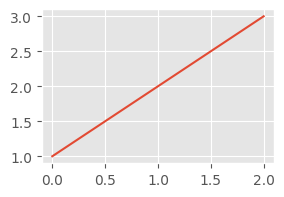

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))

### 데이터 준비하기

In [3]:
from sklearn.datasets import load_iris

# 붓꽃 데이터 로딩
iris = load_iris()
iris.keys()

print(iris.keys()) # 딕셔너리_데이터 구조 파악
print(iris) # 전체 데이터 파악 


# 독립변수
feature = iris.data
feature_name = iris.feature_names

# 종속변수
target = iris.target
target_name =iris.target_names


# 데이터프레임 만들기
df_iris = pd.DataFrame(feature,columns=feature_name) # (data, 열 = ' ')
df_iris['species'] = target # target 데이터를 'species' 열이름으로 설정 

df_iris.head()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
df_iris['species'].value_counts() # 균등하게 그룹별로 배치됨 확인인

species
0    50
1    50
2    50
Name: count, dtype: int64

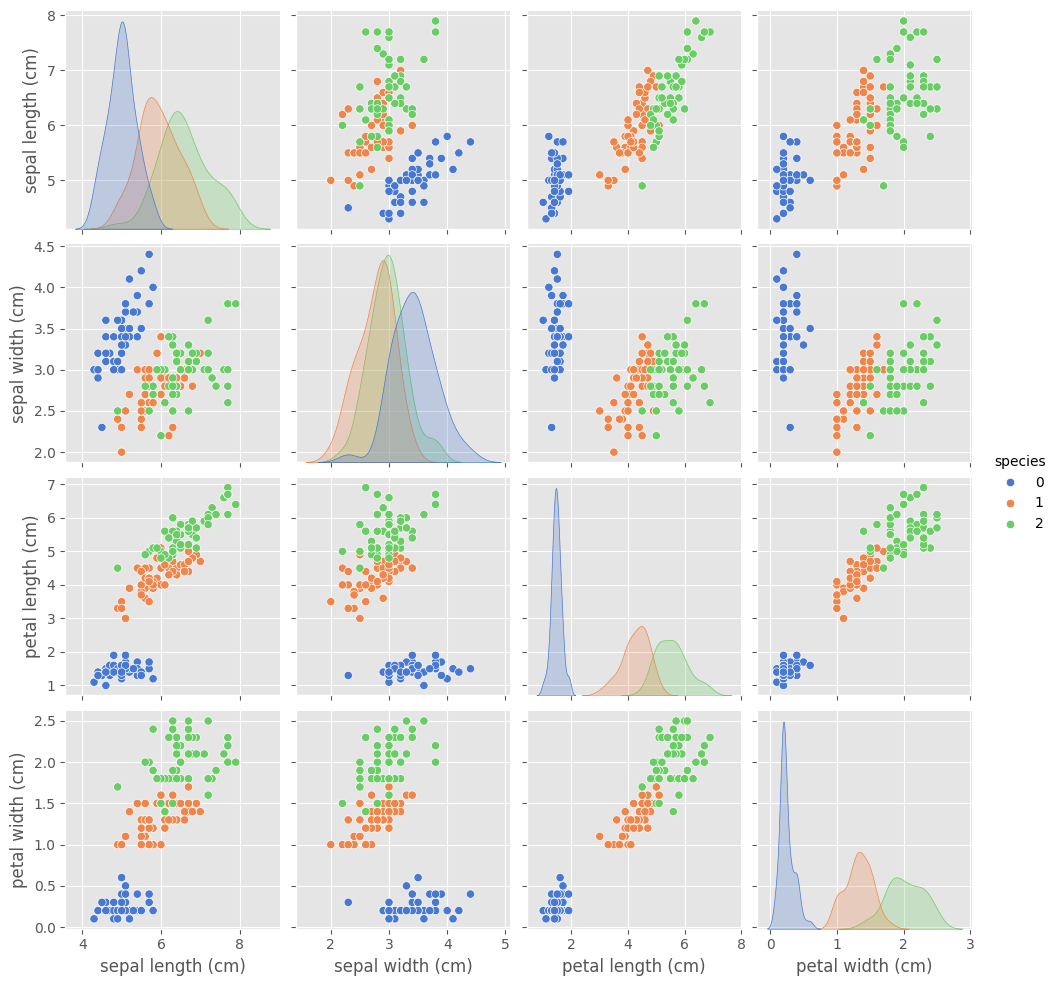

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you

In [6]:
sns.pairplot(data=df_iris,hue='species',palette='muted')

sns.pairplot?

### 데이터 분할

In [7]:
X = feature
y = target

from sklearn.model_selection import train_test_split

# stratify : 무엇을 기준으로 균등하게 분할하나? # 학습데이터와 훈련데이터로 분할되더라도 기존 데이터의 비율이 유지됨
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y) 


X_train.shape, X_test.shape, y_train.shape, y_test.shape # target 값 역시 하나의 열을 가지지만 나타내는 건 행의 값만 보임

((112, 4), (38, 4), (112,), (38,))

In [8]:
pd.Series(y_train).value_counts() # 균등함 확인

0    38
2    37
1    37
Name: count, dtype: int64

### 모델 생성 및 학습

In [9]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

### 모델평가

In [10]:
pred = model.predict(X_test)

print(f'예측:{pred}')
print(f'실제:{y_test}')

예측:[0 1 1 1 0 1 1 2 2 2 1 2 1 1 0 0 0 1 0 1 2 1 1 1 2 1 0 2 0 2 2 2 0 0 0 0 2
 1]
실제:[0 1 1 1 0 1 2 2 2 2 2 2 1 1 0 0 0 1 0 1 2 1 2 1 2 1 0 2 0 1 2 2 0 0 0 0 2
 1]


### 평가

In [11]:
# 분류모델 평가지표(정확도)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,pred)

0.8947368421052632

In [12]:
from sklearn.metrics import accuracy_score,classification_report

print(f'예측정확도 >>>>>{accuracy_score(y_test,pred)}')
print(f'classification_report >>>>>{classification_report(y_test,pred)}')


예측정확도 >>>>>0.8947368421052632
classification_report >>>>>              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.80      0.92      0.86        13
           2       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.90        38
weighted avg       0.90      0.89      0.89        38



### 결과 시각화

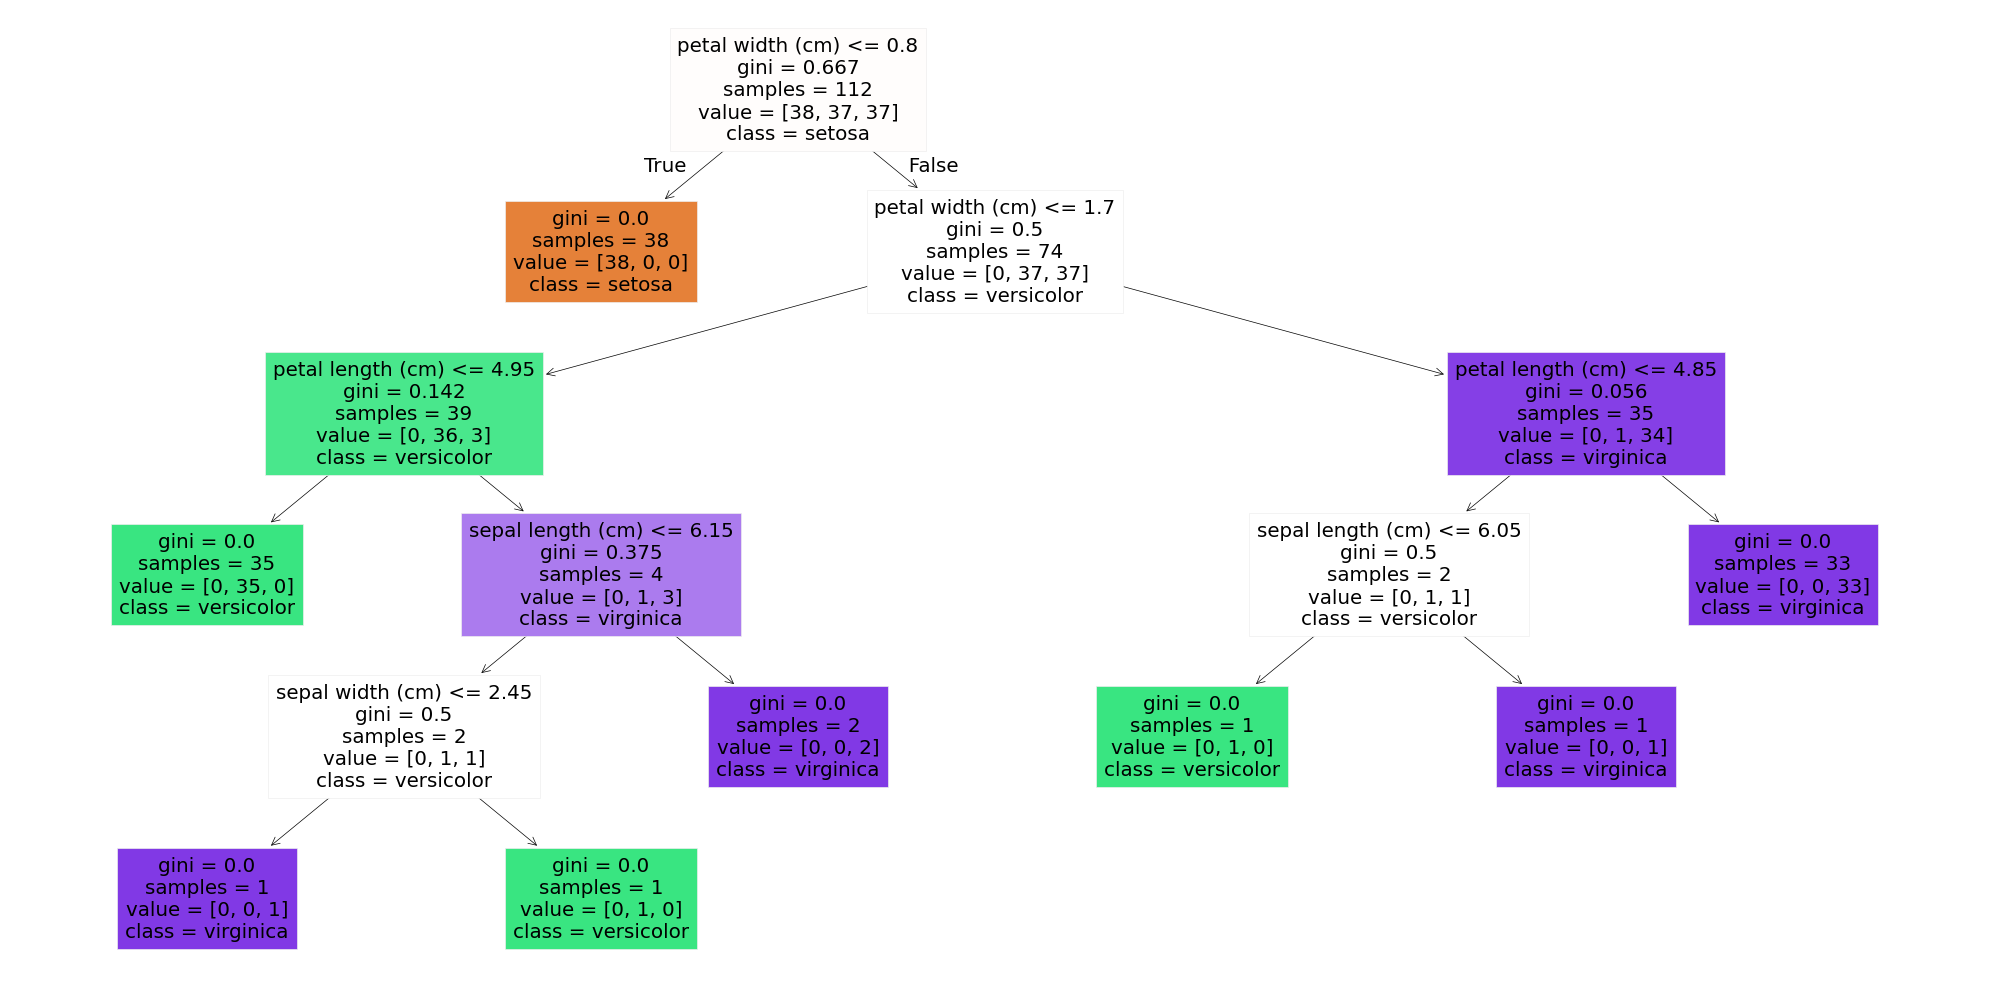

In [13]:
# 트리 시각화

plt.figure(figsize=(20,10))

from sklearn.tree import plot_tree
plot_tree(model,feature_names=feature_name,class_names=target_name,filled=True) # 노드 표시를 위한 이름 삽입 # filled : 노드 색 채우기 옵션
plt.tight_layout() # 그래프의 레이아웃을 자동으로 조정하여 그래프가 화면에 잘 맞도록 함

# 지니 불순도 차이에 따른 색깔 차이 확인

In [14]:
model.get_depth()

5

특성의 중요도:[0.02009089 0.01339392 0.06671941 0.89979578]


<Axes: >

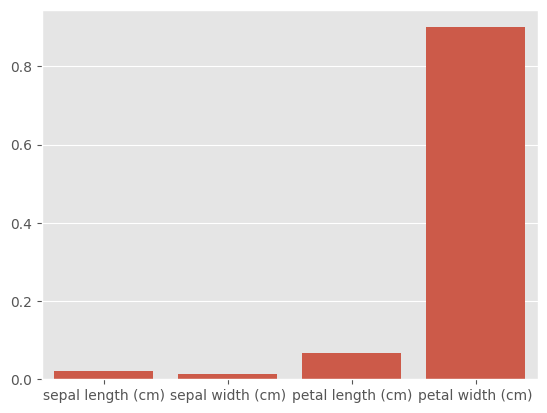

In [15]:
# 특성의 중요도

print(f'특성의 중요도:{model.feature_importances_}')
sns.barplot(x=feature_name,y=model.feature_importances_)

### 교차 검증
#### 👉 교차 검증은 모델 성능을 사전에 검증하고, 모델이 훈련 데이터에 과적합되지 않았는지를 확인하는 과정.

#### 📌 KFold vs StratifiedKFold 차이

KFold는 단순히 데이터를 n_splits 개수만큼 무작위로 나누는 방식.
StratifiedKFold는 클래스 비율을 유지하면서 나누는 방식 → 분류 문제에서는 StratifiedKFold를 더 추천함.

In [28]:
# StratifiedKFold 클래스 호출

from sklearn.model_selection import StratifiedKFold # K-Fold 교차 검증의 한 방식으로, 각 폴드에 클래스의 비율을 동일하게 유지하도록 데이터를 나눔
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)


# cross_val_score >> 빠른 모델 평가
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model,X=X_train,y=y_train,scoring='accuracy',cv=skf) # 모델 평가 지표를 정확도(accuracy)로 설정
print(f'cv_scores: {np.around(cv_scores,4)}') # np.around >> 소수점 네번째 자리까지 반올림하는 기능
print(f'cv_scores_mean: {cv_scores.mean():.4f}')


cv_scores: [0.9565 0.913  0.9091 0.9545 0.9545]
cv_scores_mean: 0.9375


In [36]:
# StratifiedKFold 클래스 호출 & 수동 모델 평가

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle=True)

cv_scores = [] # 추후 교차 검증 폴드들의 정확도 평균을 보기 위해 생성

for tr_idx,val_idx in skf.split(X_train,y_train): # StratifiedKfold는 split할 때, x와y 모두 작성 
    X_tr,y_tr = X_train[tr_idx],y_train[tr_idx]
    X_val,y_val = X_train[val_idx],y_train[val_idx]

    model.fit(X_tr,y_tr)
    pred = model.predict(X_val)
    print(f'정확도 >>>',{accuracy_score(y_val,pred)})
    cv_scores.append(accuracy_score(y_val,pred))

    print('-'*50) # 구분선
    print(f' tr_index : {tr_idx}') # 학습용 데이터셋 인덱스
    print(f' val_index :{val_idx}') # 검증용 데이터셋 인덱스

np.mean(cv_scores) # 교차검증 정확도 평균

정확도 >>> {0.9565217391304348}
--------------------------------------------------
 tr_index : [  0   1   2   3   4   5   6  10  11  12  13  16  17  18  19  20  21  22
  23  26  27  28  29  31  32  33  34  35  36  38  40  41  42  43  44  46
  47  48  50  51  52  53  55  56  58  59  60  61  62  64  66  67  69  70
  71  74  75  76  77  78  79  80  81  82  83  84  85  86  88  90  91  92
  93  94  95  96  97  98 100 101 102 103 104 106 107 108 109 110 111]
 val_index :[  7   8   9  14  15  24  25  30  37  39  45  49  54  57  63  65  68  72
  73  87  89  99 105]
정확도 >>> {0.9565217391304348}
--------------------------------------------------
 tr_index : [  0   1   3   7   8   9  11  12  13  14  15  17  19  20  22  23  24  25
  26  27  28  29  30  31  32  34  35  37  39  40  41  42  43  44  45  46
  49  51  52  53  54  55  56  57  58  59  60  63  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  83  86  87  88  89  90  91
  92  93  94  96  97  99 100 101 102 103 104 105 106 10

np.float64(0.9553359683794467)

In [29]:
# KFold 호출

from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True)


# 모델평가(수동)
for tr_idx,val_idx in kf.split(X_train):  # 학습데이터를 학습용,검증용 데이터로 분할
    X_tr,y_tr = X_train[tr_idx],y_train[tr_idx]
    X_val,y_val = X_train[val_idx],y_train[val_idx] 

    model.fit(X_tr,y_tr)
    pred = model.predict(X_val)
    print(accuracy_score(y_val,pred))

0.9565217391304348
1.0
1.0
0.7727272727272727
0.8636363636363636


### 최종 평가
#### 최종 평가는 "실제 데이터"에서의 성능을 확인하는 최종적인 모델 평가 과정

In [37]:
# 최종 평가 

pred = model.predict(X_test)
print(f'예측정확도 >>>',{accuracy_score(y_test,pred)})

예측정확도 >>> {0.9473684210526315}


##### 교차 검증은 모델이 훈련 데이터에 과적합되지 않았는지 확인하고 일반화 성능을 평가하는 과정이며, 이를 바탕으로 모델을 튜닝하면 최종 평가(Test Set)에서 더 좋은 성능을 기대할 수 있음.

### 하이퍼 파라미터(그리드서치)

In [39]:
model = DecisionTreeClassifier() # 모델 생성
kf = StratifiedKFold(n_splits=5,shuffle=True)

# 하이퍼파라미터 조합 설정
parameters = {'max_depth':[3,4,5],'min_samples_split':[2,4]}

from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(model,param_grid=parameters,cv=kf,refit=True)
# param_grid=parameters : 하이퍼파라미터 검색 범위 (parameters는 사전 {} 형태)
# refit=True : 최적의 하이퍼파라미터를 찾은 후, 해당 설정으로 모델을 다시 학습

gscv.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_split': [2, 4]})

In [40]:
# 그리드서치 결과 확인(mean_test_score 확인)
pd.DataFrame(gscv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001357,0.000169,0.000883,0.000069,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.956522,0.913043,0.954545,0.954545,0.909091,0.937549,0.021671,1
1,0.001383,0.000179,0.000888,0.000042,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.956522,0.913043,0.954545,0.954545,0.909091,0.937549,0.021671,1
2,0.001064,0.000124,0.000787,0.000035,4,2,"{'max_depth': 4, 'min_samples_split': 2}",0.956522,0.913043,0.954545,0.954545,0.909091,0.937549,0.021671,1
3,0.001360,0.000280,0.000876,0.000107,4,4,"{'max_depth': 4, 'min_samples_split': 4}",0.956522,0.913043,0.954545,0.954545,0.909091,0.937549,0.021671,1
4,0.000789,0.000117,0.000582,0.000075,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.956522,0.913043,0.954545,0.954545,0.909091,0.937549,0.021671,1
5,0.002810,0.002666,0.001309,0.000584,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.956522,0.913043,0.954545,0.954545,0.909091,0.937549,0.021671,1


In [42]:
print(f'최적의 파라미터:{gscv.best_params_}')
print(f'최고 정확도 :{gscv.best_score_}')

최적의 파라미터:{'max_depth': 3, 'min_samples_split': 2}
최고 정확도 :0.9375494071146244


In [43]:
# 최종 모델
best_model = gscv.best_estimator_

# 예측
pred = best_model.predict(X_test)
accuracy_score(y_test,pred)

0.8947368421052632

In [ ]:
# 랜덤포레스트로 교차검증 및 그리드서치 진행

from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
f = StratifiedKFold(n_splits=5,shuffle=True) # 5겹 교차 검증

# 하이퍼파라미터 준비
parameters = {'max_depth':[3,4,5],'min_samples_split':[2,4]} # 하이퍼파라미터 후보

# GridsearchCV 객체 생성
from sklearn.model_selection import GridSearchCV
gscv=GridSearchCV(model2,param_grid = parameters,cv = kf,refit=True) # 최적의 파라미터 생성 # 최종 최적 모델 생성

gscv.fit(X_train,y_train)
pd.DataFrame(gscv.cv_results_)


In [45]:
display(pd.DataFrame(gscv.cv_results_)) # display() : dataframe용 print()
print(f'최적의 파라미터 :{gscv.best_params_}')
print(f'최고 정확도 :{gscv.best_score_}')

# 최종 모델
best_model2 = gscv.best_estimator_

#예측
pred = best_model2.predict(X_test)
accuracy_score(y_test,pred)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001357,0.000169,0.000883,0.000069,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.956522,0.913043,0.954545,0.954545,0.909091,0.937549,0.021671,1
1,0.001383,0.000179,0.000888,0.000042,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.956522,0.913043,0.954545,0.954545,0.909091,0.937549,0.021671,1
2,0.001064,0.000124,0.000787,0.000035,4,2,"{'max_depth': 4, 'min_samples_split': 2}",0.956522,0.913043,0.954545,0.954545,0.909091,0.937549,0.021671,1
3,0.001360,0.000280,0.000876,0.000107,4,4,"{'max_depth': 4, 'min_samples_split': 4}",0.956522,0.913043,0.954545,0.954545,0.909091,0.937549,0.021671,1
4,0.000789,0.000117,0.000582,0.000075,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.956522,0.913043,0.954545,0.954545,0.909091,0.937549,0.021671,1
5,0.002810,0.002666,0.001309,0.000584,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.956522,0.913043,0.954545,0.954545,0.909091,0.937549,0.021671,1


최적의 파라미터 :{'max_depth': 3, 'min_samples_split': 2}
최고 정확도 :0.9375494071146244


0.8947368421052632